In [7]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc = {'figure.figsize':(10,7)})

In [3]:
# Load dataset
train_data = pd.read_csv('dataset/train.csv')
test_data = pd.read_csv('dataset/test.csv')

In [4]:
test_data.shape

(127037, 11)

In [4]:
train_data.sample(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
38163,38164,Male,27,1,36.0,1,< 1 Year,No,32237.0,152.0,48,0
273430,273431,Male,44,1,22.0,1,1-2 Year,No,28051.0,25.0,230,0
163976,163977,Male,57,1,39.0,0,1-2 Year,Yes,31388.0,124.0,14,1
175908,175909,Female,65,1,28.0,0,1-2 Year,No,41770.0,122.0,120,0
6957,6958,Male,37,1,31.0,0,1-2 Year,Yes,2630.0,148.0,169,0


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [5]:
train_data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


/home/ehsan/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Gender')

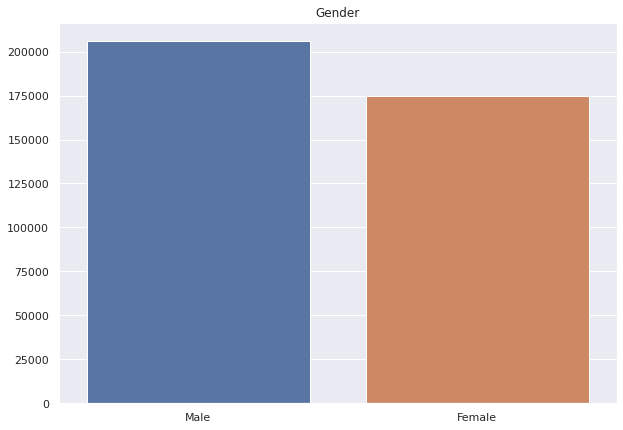

In [8]:
gender_count = train_data['Gender'].value_counts()


sns.barplot(gender_count.index, gender_count.values).set_title("Gender")

/home/ehsan/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Response')

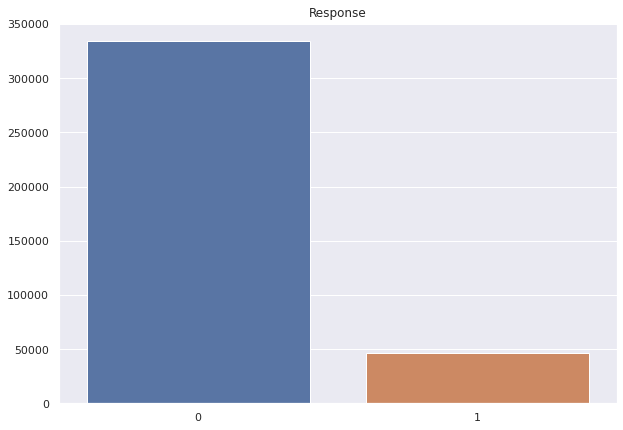

In [9]:
response_count = train_data['Response'].value_counts()

sns.barplot(response_count.index, response_count.values).set_title('Response')

1    380297
0       812
Name: Driving_License, dtype: int64


/home/ehsan/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Driving License')

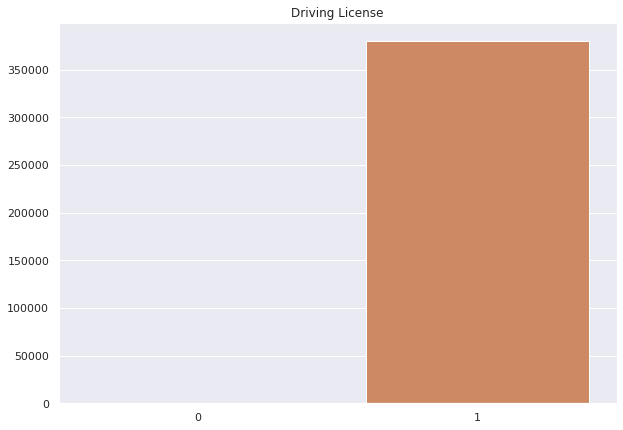

In [10]:
license_count = train_data['Driving_License'].value_counts()

print(license_count)

sns.barplot(license_count.index, license_count.values).set_title('Driving License')

/home/ehsan/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Is vehicle damaged?')

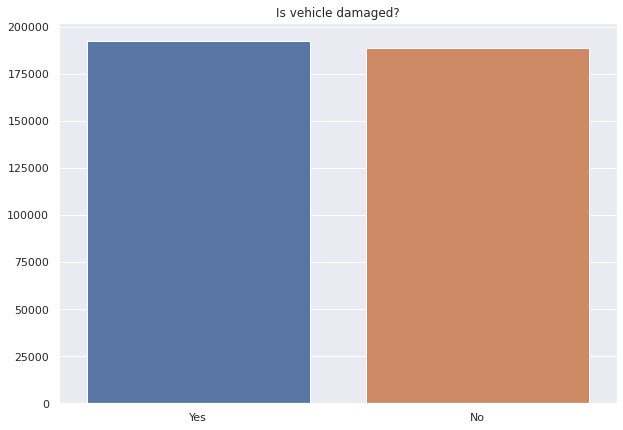

In [11]:
damage_count = train_data['Vehicle_Damage'].value_counts()

sns.barplot(damage_count.index, damage_count.values).set_title('Is vehicle damaged?')

Text(0.5, 1.0, 'Ages')

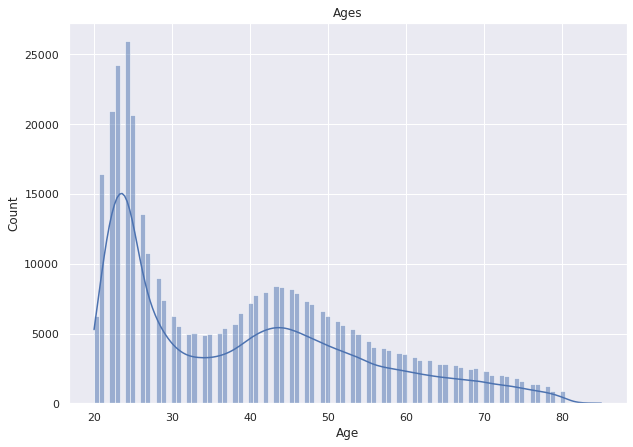

In [12]:
sns.histplot(train_data['Age'], kde=True).set_title("Ages")

Text(0.5, 1.0, 'Region_Code')

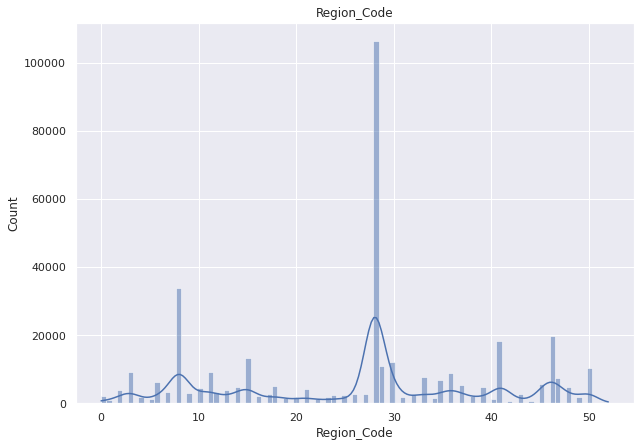

In [14]:
sns.histplot(train_data['Region_Code'], kde=True).set_title("Region_Code")

<AxesSubplot:xlabel='Age'>

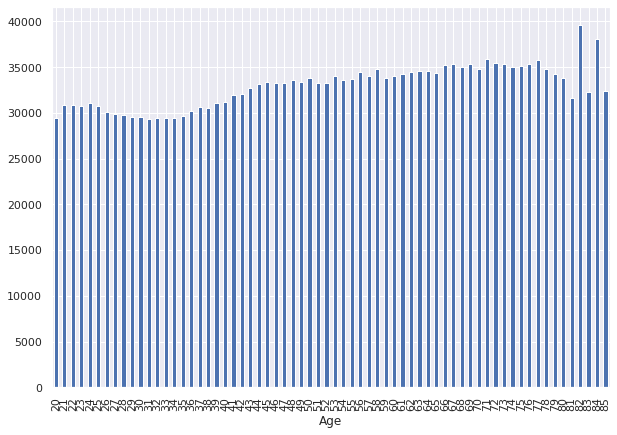

In [13]:
train_data.groupby('Age').median()['Annual_Premium'].plot(kind='bar')

<AxesSubplot:>

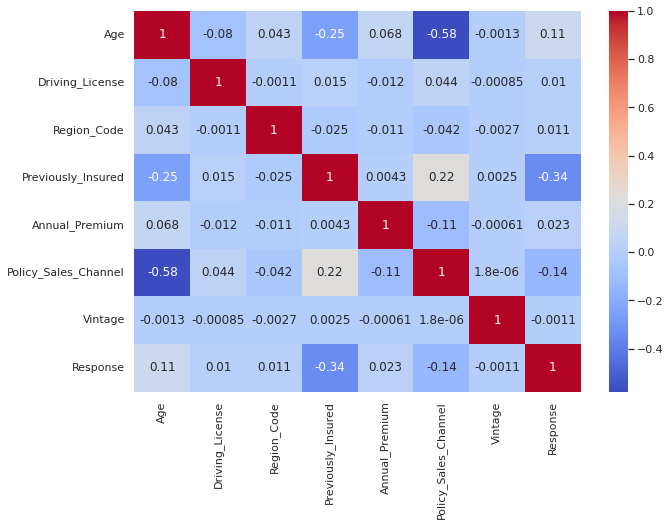

In [15]:
sns.heatmap(train_data.set_index('id').corr(), cmap='coolwarm', annot=True)

In [14]:
train_data.drop(['Vintage', 'Region_Code'], axis=1, inplace=True)
test_data.drop(['Vintage', 'Region_Code'], axis=1, inplace=True)

In [15]:
X_train = train_data.drop('Response', axis=1)

y_train = train_data['Response']

In [16]:
# Dummmy values    
cat_columns = train_data.select_dtypes(include=['object']).columns


X_train = pd.get_dummies(
    X_train,
    columns = cat_columns,
    drop_first=True)
    
X_test = pd.get_dummies(
    test_data,
    columns = cat_columns,
    drop_first=True)

In [17]:
# Time to scaling... 
scaler = MinMaxScaler(feature_range=(0, 1))
x_train = scaler.fit_transform(X_train)

x_test = scaler.transform(X_test)

In [18]:
# Find the best model in this problem
from sklearn.model_selection import cross_val_score, StratifiedKFold
# Import models
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [19]:
models = []

models.append(('LR', LogisticRegression(solver = 'liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

names = []
results = []

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=10,
        random_state=1,
        shuffle=True)
    
    cv_results = cross_val_score(
        model,
        X_train,
        y_train,
        cv = kfold,
        scoring='accuracy')
    
    names.append(name)
    results.append(cv_results)
    print(f"{name} --> mean:{cv_results.mean():.4f}, std: {cv_results.std()}")

LR --> mean:0.8774, std: 9.648100725012654e-07
LDA --> mean:0.8771, std: 0.00021682055188444412
KNN --> mean:0.8659, std: 0.0006432692624593159
DTC --> mean:0.8235, std: 0.0016830590945481627
GNB --> mean:0.8763, std: 0.00020404785640480062
